<a href="https://colab.research.google.com/github/omotolani12/Data-Science-Projects/blob/main/Joedatasentimentanalysisandmodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import tweepy
import tweepy as tw
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [44]:
df = pd.read_csv('/filename.csv')

In [45]:
print(df.to_string()) 

                                                                                                                                                                                                                                                                                                                                                                     text
0                                                                                                                                                                                                                                          : Volunteers are needed and I know many of you are ready to answer the call for this final push to the finish line, so you ca…
1                                                                                                                                                                                                                                                                              : I’m

In [46]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import re

In [47]:
import nltk
nltk.download('stopwords')

def cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    # remove html tags
    tweet = re.sub(r'<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    tweet = re.sub(r'https\S+', '', tweet)
    
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return  tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
stop_words = stopwords.words('english')
df['text']=df['text'].apply(lambda x:x.lower())
df['text'] = df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df_cleaned = df['text'].apply(cleaner)
df_cleaned.head()

0    volunteers needed know many ready answer call ...
1           ready great president! joebiden president!
2    rosie perez latino vote: power change outcome ...
3    still can't figure joebiden going trunalimunum...
4           ready great president! joebiden president!
Name: text, dtype: object

In [ ]:
def cleanTxt(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'RT\S+', '', tweet)
    tweet = re.sub(r'https\S+', '', tweet)
    
    return tweet
df['text']= df['text'].apply(cleanTxt)

df

,text
0,: Volunteers are needed and I know many of yo...
1,: I’m ready to see a great president! JoeBid...
2,Rosie Perez On Latino Vote: ‘We Have The Power...
3,I still can't figure out what JoeBiden was ...
4,: I’m ready to see a great president! JoeBid...
...,...
2359,: _Jordan Biden got 42 bills passed into law ...
2360,Retweet:\r\n\r\nNatural Law of Synchronicity i...
2361,": joeBiden Kick him in the nuts, if you can f..."
2362,We are ready! Let's go Joe!! Debates2020 Pres...


In [49]:
def getSubjectivity(tweet):
  return TextBlob(tweet).sentiment.subjectivity

def getPolarity(tweet):
  return TextBlob(tweet).sentiment.polarity

df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)

df

,text,Subjectivity,Polarity
0,volunteers needed know many ready answer call ...,0.666667,0.233333
1,ready great president! joebiden that president...,0.625000,0.600000
2,rosie perez latino vote: have power change out...,0.216667,0.208333
3,still can't figure what joebiden going trunali...,0.000000,0.000000
4,ready great president! joebiden that president...,0.625000,0.600000
...,...,...,...
2359,_jordan biden bills passed into years senate. ...,0.000000,0.000000
2360,retweet: natural synchronicity indicates biden...,0.577778,0.283333
2361,"joebiden kick nuts, find them! remember, balls...",0.000000,0.000000
2362,ready! let's joe!! debates2020 presidentialdeb...,0.500000,0.390625


In [50]:
df.describe()

,Subjectivity,Polarity
count,2364.000000,2364.000000
mean,0.237557,0.027172
std,0.305354,0.245429
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.500000,0.000000
max,1.000000,1.000000


<function matplotlib.pyplot.show>

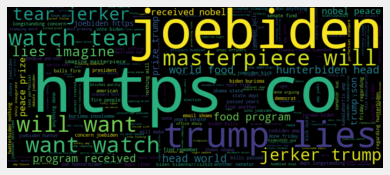

In [51]:
allWords = ' '.join( [twts for twts in df['text']] )
wordCloud = WordCloud(width = 700, height=300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show

In [12]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,text,Subjectivity,Polarity,Analysis
0,volunteers needed know many ready answer call ...,0.666667,0.233333,Positive
1,ready great president! joebiden that president...,0.625000,0.600000,Positive
2,rosie perez latino vote: have power change out...,0.216667,0.208333,Positive
3,still can't figure what joebiden going trunali...,0.000000,0.000000,Neutral
4,ready great president! joebiden that president...,0.625000,0.600000,Positive
...,...,...,...,...
2359,_jordan biden bills passed into years senate. ...,0.000000,0.000000,Neutral
2360,retweet: natural synchronicity indicates biden...,0.577778,0.283333,Positive
2361,"joebiden kick nuts, find them! remember, balls...",0.000000,0.000000,Neutral
2362,ready! let's joe!! debates2020 presidentialdeb...,0.500000,0.390625,Positive


In [13]:
df.to_csv(r'joedatawithsentiment.csv', index = False)

In [14]:
df['Analysis'].value_counts()

Neutral     1406
Positive     563
Negative     395
Name: Analysis, dtype: int64

<function matplotlib.pyplot.show>

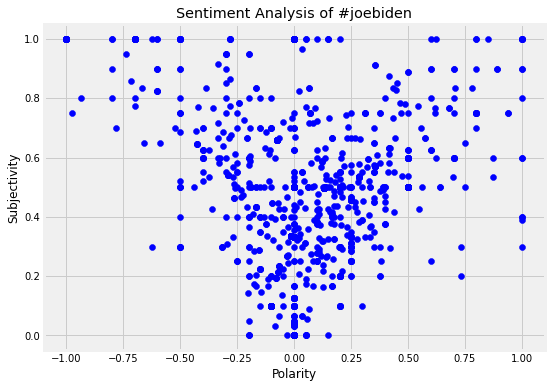

In [15]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis of #joebiden')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [16]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

ptweets

0       volunteers needed know many ready answer call ...
1       ready great president! joebiden that president...
2       rosie perez latino vote: have power change out...
4       ready great president! joebiden that president...
6       ready great president! joebiden that president...
                              ...                        
2354    really really? joebiden prove nothing. 100% wi...
2356    joebiden only release year's taxes? those with...
2358    breaking: biden’s campaign created special twi...
2360    retweet: natural synchronicity indicates biden...
2362    ready! let's joe!! debates2020 presidentialdeb...
Name: text, Length: 563, dtype: object

In [17]:
Negtweets = df[df.Analysis == 'Negative']
Negtweets = Negtweets['text']

Negtweets

7       let’s talk screwed have left country control p...
8       dear america. quick reminder your thinking abo...
11      cool this america, detroit's steviewonder will...
13                  according joebiden “you ain’t black!”
19      stop cognitive-zombie-uprising,newhampshire,nc...
                              ...                        
2297    these folks such hypocrites, projecting shit t...
2302    creepy joebiden must allowed wear earpiece tha...
2336    voting either donaldtrump joebiden because wil...
2337    voting either donaldtrump joebiden because wil...
2353    bettemidler joebiden suck nuts, when you're be...
Name: text, Length: 395, dtype: object

In [18]:
Neutweets = df[df.Analysis == 'Neutral']
Neutweets = Neutweets['text']

Neutweets

3       still can't figure what joebiden going trunali...
5       ******hurry hurry******* sign order your joebi...
9       ******hurry hurry******* sign order your joebi...
10      porait created stamping word vote! biden biden...
14      this stops joebiden. makes wonder what interna...
                              ...                        
2355    _jordan biden bills passed into years senate. ...
2357    instagram: debates2020 venezuela caracas paris...
2359    _jordan biden bills passed into years senate. ...
2361    joebiden kick nuts, find them! remember, balls...
2363    _jordan biden bills passed into years senate. ...
Name: text, Length: 1406, dtype: object

In [19]:
#get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['text']

round( (ptweets.shape[0] / df.shape[0]) *100, 1)

23.8

In [20]:
#get percentage of positive tweets
Negtweets = df[df.Analysis == 'Negative']
Negtweets = Negtweets['text']

round( (Negtweets.shape[0] / df.shape[0]) *100, 1)

16.7

In [21]:
#get percentage of positive tweets
Neutweets = df[df.Analysis == 'Neutral']
Neutweets = Neutweets['text']

round( (Neutweets.shape[0] / df.shape[0]) *100, 1)

59.5

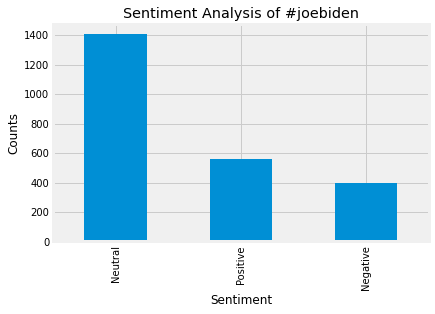

In [22]:
# show the value count
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis of #joebiden')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from nltk.stem.porter import PorterStemmer

from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Flatten, Dropout

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


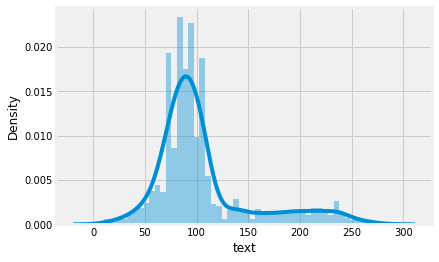

In [24]:
# finding length of tweets
lens = df['text'].str.len()
sns.distplot(lens)

In [25]:
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)

                #Make a dataframe 
        missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=missings.Features,y=missings.MissingPercent, palette="Blues_d").set_title('Percentage of Missing Values')
        return missings
    else:
        print("There are no missing values!")
        return False

get_missings(df)

There are no missing values!


False

In [ ]:
y = df["Analysis"]

In [26]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['text'].values)
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X)

In [27]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data


pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.


0.96

In [28]:
print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (75, 20)
y_train shape:  (75,)
X_test shape:  (25, 20)
y_test shape:  (25,)


In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train, y_train)
print("Train Score:",LR.score(X_train, y_train))
print("Test Score:",LR.score(X_test, y_test))

Train Score: 1.0
Test Score: 1.0


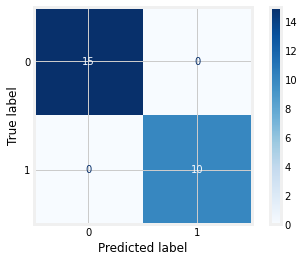

In [ ]:
cm = confusion_matrix(y_test, LR.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
print(classification_report(y_test, LR.predict(X_test)))
print("F1 Score:", f1_score(y_test, LR.predict(X_test)))
f1_LR = f1_score(y_test, LR.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

F1 Score: 1.0


In [29]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
print("Train Score:",RF.score(X_train, y_train))
print("Test Score:",RF.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.88


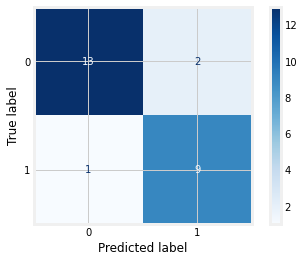

In [30]:
cm = confusion_matrix(y_test, RF.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [31]:
print(classification_report(y_test, RF.predict(X_test)))
print("F1 Score:", f1_score(y_test, RF.predict(X_test)))
f1_RF = f1_score(y_test, RF.predict(X_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.82      0.90      0.86        10

    accuracy                           0.88        25
   macro avg       0.87      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25

F1 Score: 0.8571428571428572


In [32]:
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(X_train, y_train)
print("Train Score:",KN.score(X_train, y_train))
print("Test Score:",KN.score(X_test, y_test))

Train Score: 0.9866666666666667
Test Score: 0.8


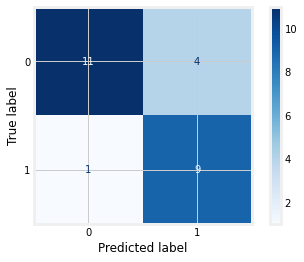

In [33]:
cm = confusion_matrix(y_test, KN.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [34]:
print(classification_report(y_test, KN.predict(X_test)))
print("F1 Score:", f1_score(y_test, KN.predict(X_test)))
f1_KN = f1_score(y_test, KN.predict(X_test))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.69      0.90      0.78        10

    accuracy                           0.80        25
   macro avg       0.80      0.82      0.80        25
weighted avg       0.83      0.80      0.80        25

F1 Score: 0.7826086956521738


In [35]:
from sklearn.svm import SVC

SVM = SVC()
SVM.fit(X_train, y_train)
print("Train Score:",SVM.score(X_train, y_train))
print("Test Score:",SVM.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.92


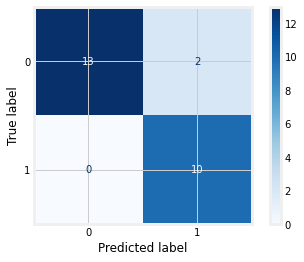

In [36]:
cm = confusion_matrix(y_test, SVM.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [37]:
print(classification_report(y_test, SVM.predict(X_test)))
print("F1 Score:", f1_score(y_test, SVM.predict(X_test)))
f1_SVM = f1_score(y_test, SVM.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

F1 Score: 0.9090909090909091


In [38]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
print("Train Score:",XGB.score(X_train, y_train))
print("Test Score:",XGB.score(X_test, y_test))

Train Score: 1.0
Test Score: 0.92


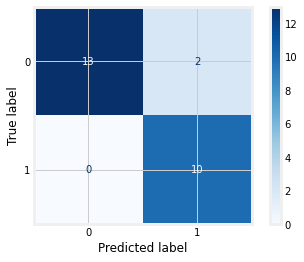

In [39]:
cm = confusion_matrix(y_test, XGB.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [40]:
print(classification_report(y_test, XGB.predict(X_test)))
print("F1 Score:", f1_score(y_test, XGB.predict(X_test)))
f1_XGB = f1_score(y_test, XGB.predict(X_test))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.83      1.00      0.91        10

    accuracy                           0.92        25
   macro avg       0.92      0.93      0.92        25
weighted avg       0.93      0.92      0.92        25

F1 Score: 0.9090909090909091


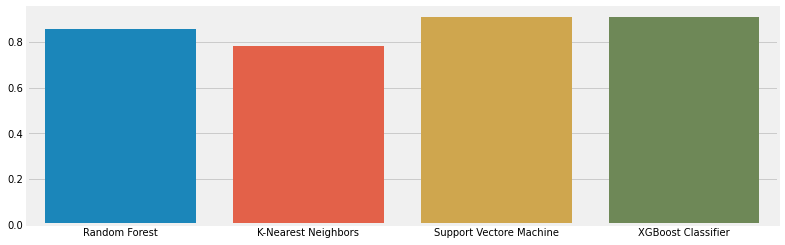

In [42]:
models = ['Random Forest', 'K-Nearest Neighbors', "Support Vectore Machine", "XGBoost Classifier"]
model_f1 = [f1_RF, f1_KN, f1_SVM, f1_XGB]

plt.figure(figsize=(12,4))
sns.barplot(x = models, y=model_f1)